In [1]:
import pandas as pd
import os
import string
import matplotlib.pyplot as plt 
import numpy as np
from pybaselines import whittaker

## Datasets forming

In [2]:
def get_food_fasting_datasets(annotation_cols, diabetes=True):
    files_in_dir = os.listdir()
    if diabetes:
        annotation_cols.append('Наличие диабета')
    df_ppg_train = pd.DataFrame()
    df_annotation_train = pd.DataFrame()
    # collecting ppg data from files
    for csv in list(filter(lambda x:'PPG' in x, files_in_dir)):
        df = pd.read_csv(csv, usecols=['cid', 'ppg_data'])
        df_ppg_train = pd.concat([df_ppg_train, df])
    # collecting annotation data
    else:
        for xlsx in list(filter(lambda x: x[0].lower() not in string.ascii_lowercase and x[0].isalpha(), files_in_dir)):
            df = pd.read_excel(xlsx, usecols=annotation_cols)
            df_annotation_train = pd.concat([df_annotation_train, df])
        df_train = pd.merge(df_ppg_train, df_annotation_train.rename(columns={'Номер ЭКГ/ФПГ': 'cid'}), on='cid').dropna(subset='Уровень глюкозы, ммоль/л')
        # converting string representation of list to list
        df_train['ppg_data'] = df_train['ppg_data'].apply(lambda x: list(map(float, x.strip('][').split(','))))
    # splitting fasting and after food data
    fasting_filt = df_train['Натощак'] == 1
    food_filt = df_train['Натощак'] == 0
    return df_train[food_filt].drop(['Натощак'], axis='columns'), df_train[fasting_filt].drop(['Натощак'], axis='columns')

In [3]:
annotation_cols = ['Номер ЭКГ/ФПГ',  'Уровень глюкозы, ммоль/л', 
                   'Возраст, лет', 'Вес, кг', 'Рост, см', 'Пол',
                   'Натощак']
df_food, df_fasting = get_food_fasting_datasets(annotation_cols)

In [4]:
df_fasting

,cid,ppg_data,Наличие диабета,"Уровень глюкозы, ммоль/л","Возраст, лет","Вес, кг","Рост, см",Пол
3,97381,"[-0.82592773, -0.8257141, -0.82559204, -0.8255...",2,8.3,65,65,164,2
7,97945,"[-0.8257446, -0.8256836, -0.8256836, -0.825683...",2,6.7,65,65,164,2
10,98717,"[-0.80392456, -0.8045654, -0.8045654, -0.80456...",2,11.0,66,112,164,2
17,98163,"[-0.8491821, -0.848938, -0.848938, -0.84921265...",2,9.1,63,102,178,1
22,99019,"[-0.81933594, -0.81933594, -0.81915283, -0.819...",2,7.8,68,95,180,1
...,...,...,...,...,...,...,...,...
2924,157927,"[-0.8039856, -0.8039856, -0.8039856, -0.803680...",0,5.7,67,80,158,2
2925,157780,"[-0.28527832, -0.2849121, -0.28527832, -0.2852...",0,5.6,65,79,158,2
2926,158033,"[-0.84832764, -0.8487854, -0.84817505, -0.8487...",0,5.6,59,90,164,2
2927,157920,"[-0.8552246, -0.8552246, -0.85546875, -0.85568...",0,5.6,64,92,164,2


In [5]:
df_food

,cid,ppg_data,Наличие диабета,"Уровень глюкозы, ммоль/л","Возраст, лет","Вес, кг","Рост, см",Пол
0,97212,"[-0.65444946, -0.65448, -0.6548462, -0.654541,...",2,6.0,48,108,160,2
1,97213,"[-0.78826904, -0.7880249, -0.7880249, -0.78808...",2,7.7,56,100,160,2
2,97223,"[-0.80532837, -0.80529785, -0.80496216, -0.804...",2,7.5,56,100,160,2
4,97428,"[-0.84210205, -0.8423462, -0.84228516, -0.8423...",2,14.7,65,65,164,2
5,97747,"[-0.7573242, -0.7573242, -0.756897, -0.756897,...",2,8.2,65,65,164,2
...,...,...,...,...,...,...,...,...
2621,105384,"[-0.63290405, -0.63305664, -0.63305664, -0.633...",2,11.2,50,122,172,2
2622,105394,"[-0.8357544, -0.8360596, -0.8360596, -0.835907...",2,6.8,86,173,65,1
2623,105626,"[-0.80340576, -0.8034668, -0.8038025, -0.80380...",2,17.3,86,173,65,1
2625,103667,"[-0.76293945, -0.76293945, -0.7626648, -0.7625...",0,5.8,26,62,167,2


In [6]:
df_fasting.to_csv('fasting.csv', index=False)

In [7]:
df_food.to_csv('food.csv', index=False)

In [2]:
df_fasting = pd.read_csv('fasting.csv')
df_fasting['ppg_data'] = df_fasting['ppg_data'].apply(lambda x: list(map(float, x.strip('][').split(','))))

In [4]:
df_food = pd.read_csv('food.csv')
df_food['ppg_data'] = df_food['ppg_data'].apply(lambda x: list(map(float, x.strip('][').split(','))))

## Data preprocessing

**Gaussian filter**

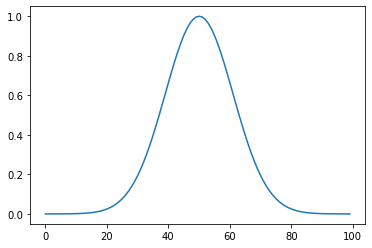

In [223]:
sigRate = 1000
fwhm = 25 # in ms
k = 50
gauss_time = np.arange(-k,k)
# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gauss_time**2) / fwhm**2 )

pstPeakHalf = k + np.argmin( (gauswin[k:]-.5)**2 )
prePeakHalf = np.argmin( (gauswin-.5)**2 )
empFWHM = gauss_time[pstPeakHalf] - gauss_time[prePeakHalf]

gauss_win = np.exp(-(4*np.log(2)*gauss_time**2) / empFWHM**2 )
plt.plot(gauss_win)

Text(0.5, 1.0, 'Gaussian smoothing filter')

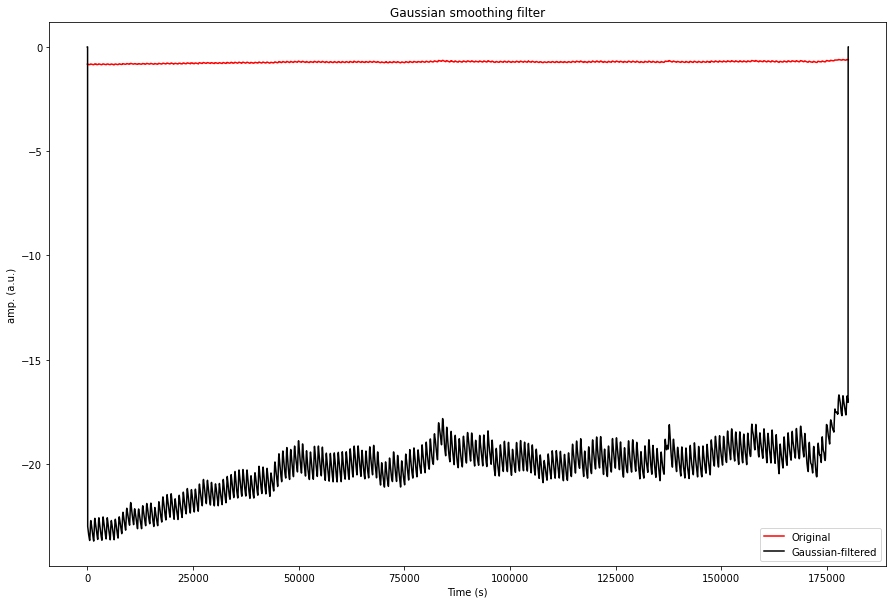

In [225]:
# initialize filtered signal vector
n = len(df_fasting['ppg_data'][0])
signal = np.array(df_fasting['ppg_data'][0])
filtSig_Gauss = np.zeros(n)
# # implement the running mean filter
for i in range(k+1, n-k-1):
    # each point is the weighted average of k surrounding points
    filtSig_Gauss[i] = np.sum(signal[i-k:i+k]*gauss_win )
    
plt.figure(figsize= (15, 10))
plt.plot(signal,'r',label='Original')
plt.plot(filtSig_Gauss,'k',label='Gaussian-filtered')
plt.xlabel('Time (s)')
plt.ylabel('amp. (a.u.)')
plt.legend()
plt.title('Gaussian smoothing filter')

**Running mean filter**

Text(0.5, 1.0, 'Gaussian smoothing filter')

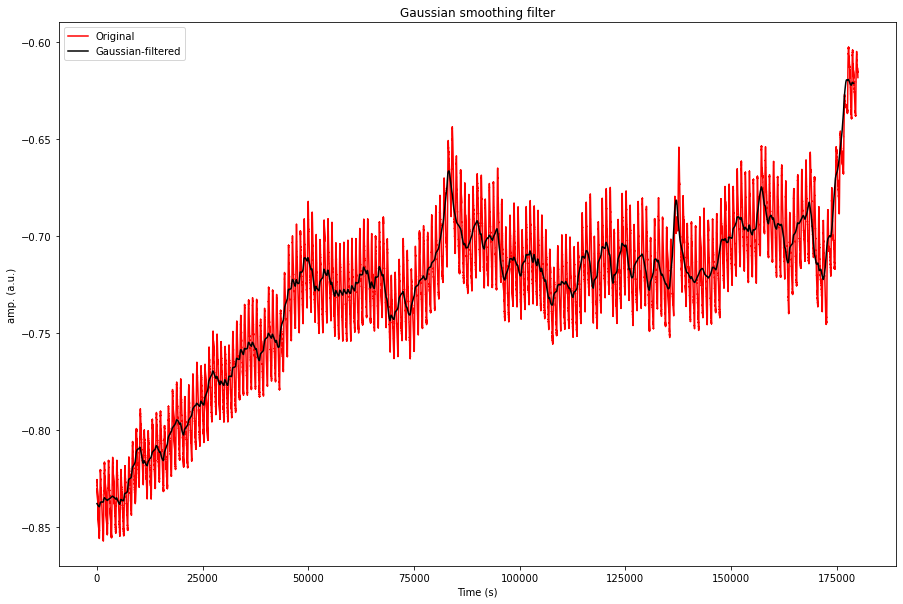

In [202]:
# initialize filtered signal vector
signal = np.array(df_fasting['ppg_data'][0])
N = 1000
# # implement the running mean filter
filtSig = np.convolve(np.array(signal), np.ones(N)/N, mode='valid')

plt.figure(figsize= (15, 10))
plt.plot(np.array(df_fasting['ppg_data'][0]))
plt.plot(signal,'r',label='Original')
plt.plot(filtSig,'k',label='Mean-filtered')
plt.xlabel('Time (ms)')
plt.ylabel('amp. (a.u.)')
plt.legend()
plt.title('Running mean filter')

**Asymmetric least squares**

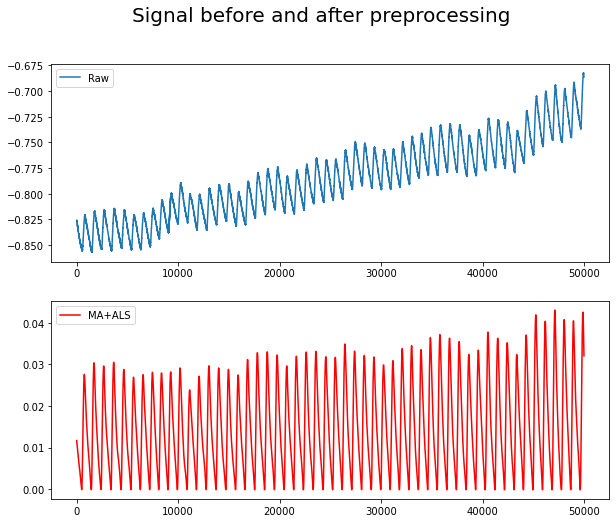

In [238]:
res = np.array(filtSig) - whittaker.iasls(filtSig)[0]
fig = plt.figure( figsize=(10, 8))
fig.suptitle('Signal before and after preprocessing', fontsize=20)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
ax1.plot(df_fasting['ppg_data'][0][:50000], label='Raw')
ax2.plot(res[:50000], color='r', label='MA+ALS')
ax1.legend()
ax2.legend()

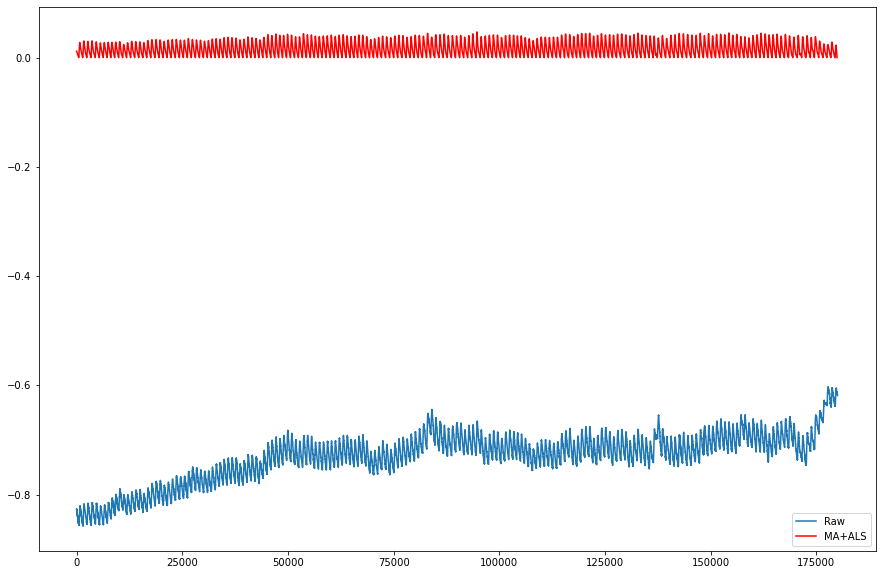

In [239]:
plt.figure(figsize=(15, 10))
res = np.array(filtSig) - whittaker.iasls(filtSig)[0]
plt.plot(np.array(df_fasting['ppg_data'][0]), label='Raw')
plt.plot(res,'r', label='MA+ALS')
plt.legend()

In [2]:
def mov_avg_and_als(signal, width=1000):
    filt_sig = np.convolve(np.array(signal), np.ones(width)/width, mode='valid')
    return list(np.round(filt_sig - whittaker.iasls(filt_sig)[0], 4))

In [3]:
def preprocess_csv(name):
    chunksize = 500
    with pd.read_csv(f'{name}.csv', chunksize=chunksize) as reader:
        for i, chunk in enumerate(reader):
            chunk.columns = ['cid', 'ppg_data', 'Наличие диабета', 'Уровень глюкозы, ммоль/л',
       'Возраст, лет', 'Вес, кг', 'Рост, см', 'Пол']
            chunk['ppg_data'] = chunk['ppg_data'].apply(lambda x: mov_avg_and_als(list(map(float, x.strip('][').split(',')))))
            chunk.to_csv(f'{name}_preprocessed.csv', index=False, mode='a')
            if i % 2 == 0:
                print(i)

In [4]:
preprocess_csv('food')

0
2
4


In [5]:
preprocess_csv('fasting')

0
